# Load packages and data

In [1]:
setwd("/projects/ohlab/ruoyun/MECFS/train_model/MECFS")
pacman::p_load(Maaslin2, dplyr, ggplot2, stringr)

### Metadata - potential confounders

In [2]:
data = read.csv("all_tps/data/metadata/labels_all_082922.csv", header = T, row.names = 1)
data = data[,data['timepoints',] == 'tp1'] %>% t()
rownames(data) = data[,'sample_id_tp1']
data = data[,-which(colnames(data) %in% c("timepoints","sample_id_tp1","samples_id","age_group"))]
meta_data = data

### Microbiome and Metabolomics data

In [3]:
abun = read.csv("data/metagenomics/metaphlan3_specie_filtered_zscored_071020.csv", header = T, row.names = 1)
kegg = read.csv("data/metagenomics/kegg_gene_filtered_normalized_070220.txt", header = T, row.names = 1, sep = '\t')
bioc = read.csv("data/metabolomics/metabolomics_normalized_filtered_071020.csv", header = T, row.names = 1)

In [4]:
samples = intersect(colnames(kegg)[grep('SAM', colnames(kegg))], colnames(bioc)[grep('SAM', colnames(bioc))])

In [5]:
meta_data = meta_data[samples, ] %>% t() %>% as.data.frame()
levels = c('ID','sample',rownames(meta_data))
meta_data['sample',] = colnames(meta_data)
meta_data['ID',] = colnames(meta_data)
meta_data = meta_data[levels, ] %>% t() %>% as.data.frame()

In [6]:
abun = abun[, samples]
kegg = kegg[, samples]
bioc = bioc[, samples]
rownames(abun) = paste('Specie_', str_split_fixed(rownames(abun), "\\|",2)[,2], sep = "")
rownames(kegg) = paste('Microbiome_gene_',rownames(kegg), sep = "")
rownames(bioc) = paste('Bioc_',rownames(bioc), sep = "") %>% str_replace('X - ', 'X_')
# combine all features for downstream analysis
data = rbind(abun, kegg, bioc)
levels = c('ID',rownames(data))
data['ID',] = colnames(data)
data = data[levels, ] %>% t() %>% as.data.frame()

# MaAsLin

### Write input for MaAsLin2, tab-delimited file

In [7]:
write.table(meta_data, "all_tps/data/metadata/maaslin/maaslin_meta_data_082922.txt",sep = "\t", quote = F, row.names = F)
write.table(data, "all_tps/data/metadata/maaslin/maaslin_data_082922.txt",sep = "\t",quote = F, row.names = F)

[1] "Creating output folder"
[1] "Creating output figures folder"
2022-08-30 15:40:01 INFO::Writing function arguments to log file
2022-08-30 15:40:01 INFO::Verifying options selected are valid
2022-08-30 15:40:01 INFO::Determining format of input files
2022-08-30 15:40:01 INFO::Input format is data samples as rows and metadata samples as rows
2022-08-30 15:40:01 INFO::Formula for fixed effects: expr ~  age + gender + ethnic + race + IBS
2022-08-30 15:40:01 INFO::Filter data based on min abundance and min prevalence
2022-08-30 15:40:01 INFO::Total samples in data: 180
2022-08-30 15:40:01 INFO::Min samples required with min abundance for a feature not to be filtered: 18.000000
2022-08-30 15:40:01 INFO::Total filtered features: 89
2022-08-30 15:40:01 INFO::Filtered feature names from abundance and prevalence filtering: Specie_Bacteroides_plebeius, Specie_Eubacterium_sp_CAG_180, Specie_Parabacteroides_johnsonii, Specie_Bacteroides_coprocola, Specie_Alistipes_inops, Specie_Phascolarctobact

Warning message in vegan::decostand(features_norm, method = "total", MARGIN = 1, :
“input data contains negative entries: result may be non-sense
”


2022-08-30 15:40:02 INFO::Applying z-score to standardize continuous metadata
2022-08-30 15:40:02 INFO::Running selected transform method: LOG


Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

2022-08-30 15:40:08 INFO::Running selected analysis method: LM
2022-08-30 15:40:08 INFO::Fitting model to feature number 1, Specie_Bacteroides_vulgatus
2022-08-30 15:40:08 INFO::Fitting model to feature number 2, Specie_Bacteroides_uniformis
2022-08-30 15:40:08 INFO::Fitting model to feature number 3, Specie_Bacteroides_stercoris
2022-08-30 15:40:08 INFO::Fitting model to feature number 4, Specie_Prevotella_copri
2022-08-30 15:40:08 INFO::Fitting model to feature number 5, Specie_Bacteroides_dorei
2022-08-30 15:40:08 INFO::Fitting model to feature number 6, Specie_Faecalibacterium_prausnitzii
2022-08-30 15:40:08 INFO::Fitting model to feature number 7, Specie_Alistipes_putredinis
2022-08-30 15:40:08 INFO::Fitting model to feature number 8, Specie_Bacteroides_ovatus
2022-08-30 15:40:08 INFO::Fitting model to feature number 9, Specie_Parabacteroides_distasonis
2022-08-30 15:40:08 INFO::Fitting model to feature number 10, Specie_Eubacterium_rectale
2022-08-30 15:40:08 INFO::Fitting model 

2022-08-30 15:40:34 INFO::Writing association plots (one for each significant association) to output folder: /projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/demographic
2022-08-30 15:40:34 INFO::Plotting associations from most to least significant, grouped by metadata
2022-08-30 15:40:34 INFO::Plotting data for metadata number 1, gender
2022-08-30 15:40:34 INFO::Creating boxplot for categorical data, gender vs Bioc_5alpha.androstan.3alpha.17beta.diol.monosulfate..2.
2022-08-30 15:40:34 INFO::Creating boxplot for categorical data, gender vs Bioc_5alpha.androstan.3alpha.17beta.diol.disulfate
2022-08-30 15:40:35 INFO::Creating boxplot for categorical data, gender vs Bioc_5alpha.androstan.3beta.17beta.diol.disulfate
2022-08-30 15:40:35 INFO::Creating boxplot for categorical data, gender vs Bioc_urate
2022-08-30 15:40:35 INFO::Creating boxplot for categorical data, gender vs Bioc_2S.3R.dihydroxybutyrate
2022-08-30 15:40:35 INFO::Creating boxplot for categorical 

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:38 INFO::Creating scatter plot for continuous data, IBS vs Bioc_S.adenosylhomocysteine..SAH.


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:38 INFO::Creating scatter plot for continuous data, IBS vs Bioc_kynurenine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:38 INFO::Creating scatter plot for continuous data, IBS vs Bioc_N6.succinyladenosine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:39 INFO::Creating scatter plot for continuous data, IBS vs Bioc_quinolinate


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:39 INFO::Creating scatter plot for continuous data, IBS vs Bioc_X_11261


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:39 INFO::Creating scatter plot for continuous data, IBS vs Bioc_5.methylthioadenosine..MTA.


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:39 INFO::Creating scatter plot for continuous data, IBS vs Bioc_2.O.methylascorbic.acid


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:39 INFO::Creating scatter plot for continuous data, IBS vs Bioc_tyrosine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:39 INFO::Creating scatter plot for continuous data, IBS vs Bioc_cys.gly..oxidized


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:39 INFO::Creating scatter plot for continuous data, IBS vs Bioc_eugenol.sulfate


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:39 INFO::Creating scatter plot for continuous data, IBS vs Bioc_N.formylmethionine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:40 INFO::Creating scatter plot for continuous data, IBS vs Bioc_5.6.dihydrouridine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:40 INFO::Creating scatter plot for continuous data, IBS vs Specie_Coprococcus_comes


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”


2022-08-30 15:40:40 INFO::Creating scatter plot for continuous data, IBS vs Bioc_gamma.glutamyltyrosine


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 59 rows containing miss

2022-08-30 15:40:41 INFO::Plotting data for metadata number 3, race
2022-08-30 15:40:41 INFO::Creating scatter plot for continuous data, race vs Bioc_2.methoxyresorcinol.sulfate


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:41 INFO::Creating scatter plot for continuous data, race vs Bioc_sucralose


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:42 INFO::Creating scatter plot for continuous data, race vs Bioc_.S..3.hydroxybutyrylcarnitine


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:42 INFO::Creating scatter plot for continuous data, race vs Bioc_X_17685


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:42 INFO::Plotting data for metadata number 4, age
2022-08-30 15:40:42 INFO::Creating scatter plot for continuous data, age vs Bioc_X_15461


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:43 INFO::Creating scatter plot for continuous data, age vs Bioc_X_15503


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:43 INFO::Creating scatter plot for continuous data, age vs Bioc_pregnenediol.sulfate..C21H34O5S..


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:43 INFO::Creating scatter plot for continuous data, age vs Bioc_X_13553


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:43 INFO::Creating scatter plot for continuous data, age vs Bioc_quinolinate


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:43 INFO::Creating scatter plot for continuous data, age vs Bioc_guanidinosuccinate


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:43 INFO::Creating scatter plot for continuous data, age vs Bioc_hydroxyasparagine


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:43 INFO::Creating scatter plot for continuous data, age vs Bioc_1.methyl.4.imidazoleacetate


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:43 INFO::Creating scatter plot for continuous data, age vs Bioc_arabitol.xylitol


`geom_smooth()` using formula 'y ~ x'



2022-08-30 15:40:44 INFO::Creating scatter plot for continuous data, age vs Bioc_pregnenetriol.disulfate.


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



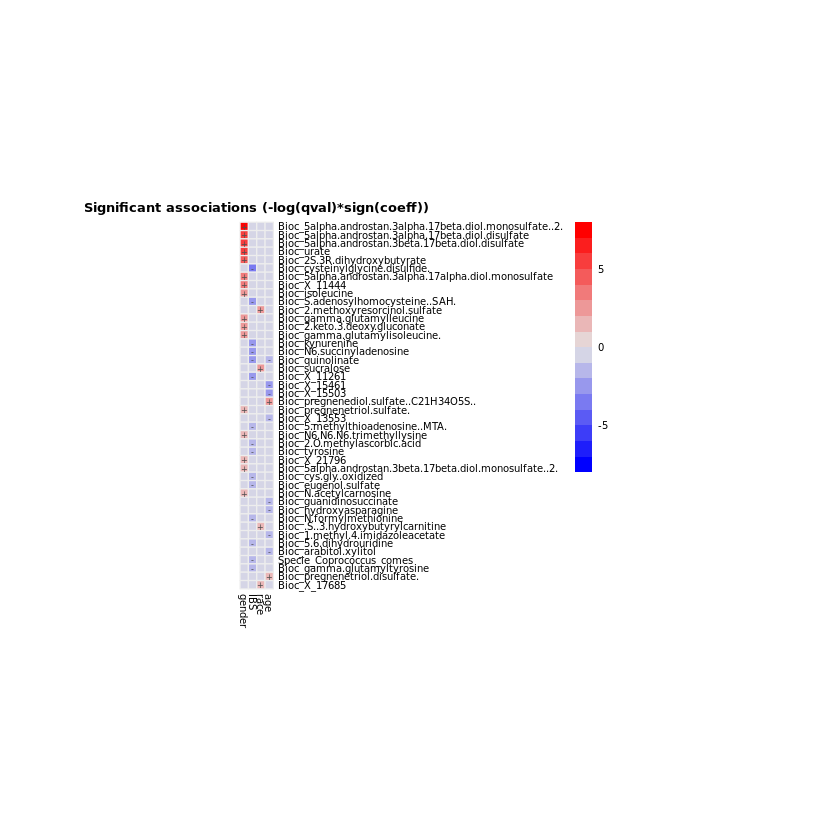

In [11]:
demographic = Maaslin2(
    input_data = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_data_082922.txt', 
    input_metadata = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_meta_data_082922.txt', 
    output = "/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/demographic", 
    fixed_effects = c('age','gender','ethnic','race','IBS'),
    reference = 'study_ptorhc'
)

[1] "Creating output folder"
[1] "Creating output figures folder"
2022-08-30 15:48:31 INFO::Writing function arguments to log file
2022-08-30 15:48:31 INFO::Verifying options selected are valid
2022-08-30 15:48:31 INFO::Determining format of input files
2022-08-30 15:48:31 INFO::Input format is data samples as rows and metadata samples as rows
2022-08-30 15:48:31 INFO::Formula for fixed effects: expr ~  diet_meat + diet_sugar + diet_veg + diet_grains + diet_fruit
2022-08-30 15:48:31 INFO::Filter data based on min abundance and min prevalence
2022-08-30 15:48:31 INFO::Total samples in data: 180
2022-08-30 15:48:31 INFO::Min samples required with min abundance for a feature not to be filtered: 18.000000
2022-08-30 15:48:31 INFO::Total filtered features: 89
2022-08-30 15:48:31 INFO::Filtered feature names from abundance and prevalence filtering: Specie_Bacteroides_plebeius, Specie_Eubacterium_sp_CAG_180, Specie_Parabacteroides_johnsonii, Specie_Bacteroides_coprocola, Specie_Alistipes_inop

Warning message in vegan::decostand(features_norm, method = "total", MARGIN = 1, :
“input data contains negative entries: result may be non-sense
”


2022-08-30 15:48:32 INFO::Applying z-score to standardize continuous metadata
2022-08-30 15:48:32 INFO::Running selected transform method: LOG


Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

2022-08-30 15:48:38 INFO::Running selected analysis method: LM
2022-08-30 15:48:38 INFO::Fitting model to feature number 1, Specie_Bacteroides_vulgatus
2022-08-30 15:48:38 INFO::Fitting model to feature number 2, Specie_Bacteroides_uniformis
2022-08-30 15:48:38 INFO::Fitting model to feature number 3, Specie_Bacteroides_stercoris
2022-08-30 15:48:38 INFO::Fitting model to feature number 4, Specie_Prevotella_copri
2022-08-30 15:48:38 INFO::Fitting model to feature number 5, Specie_Bacteroides_dorei
2022-08-30 15:48:38 INFO::Fitting model to feature number 6, Specie_Faecalibacterium_prausnitzii
2022-08-30 15:48:38 INFO::Fitting model to feature number 7, Specie_Alistipes_putredinis
2022-08-30 15:48:38 INFO::Fitting model to feature number 8, Specie_Bacteroides_ovatus
2022-08-30 15:48:38 INFO::Fitting model to feature number 9, Specie_Parabacteroides_distasonis
2022-08-30 15:48:38 INFO::Fitting model to feature number 10, Specie_Eubacterium_rectale
2022-08-30 15:48:38 INFO::Fitting model 

2022-08-30 15:49:03 INFO::Writing association plots (one for each significant association) to output folder: /projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/diet
2022-08-30 15:49:03 INFO::Plotting associations from most to least significant, grouped by metadata
2022-08-30 15:49:03 INFO::Plotting data for metadata number 1, diet_sugar
2022-08-30 15:49:03 INFO::Creating scatter plot for continuous data, diet_sugar vs Bioc_X_12127


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_point).”


2022-08-30 15:49:03 INFO::Plotting data for metadata number 2, diet_meat
2022-08-30 15:49:03 INFO::Creating scatter plot for continuous data, diet_meat vs Bioc_X_12798


`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing missing values (geom_point).”


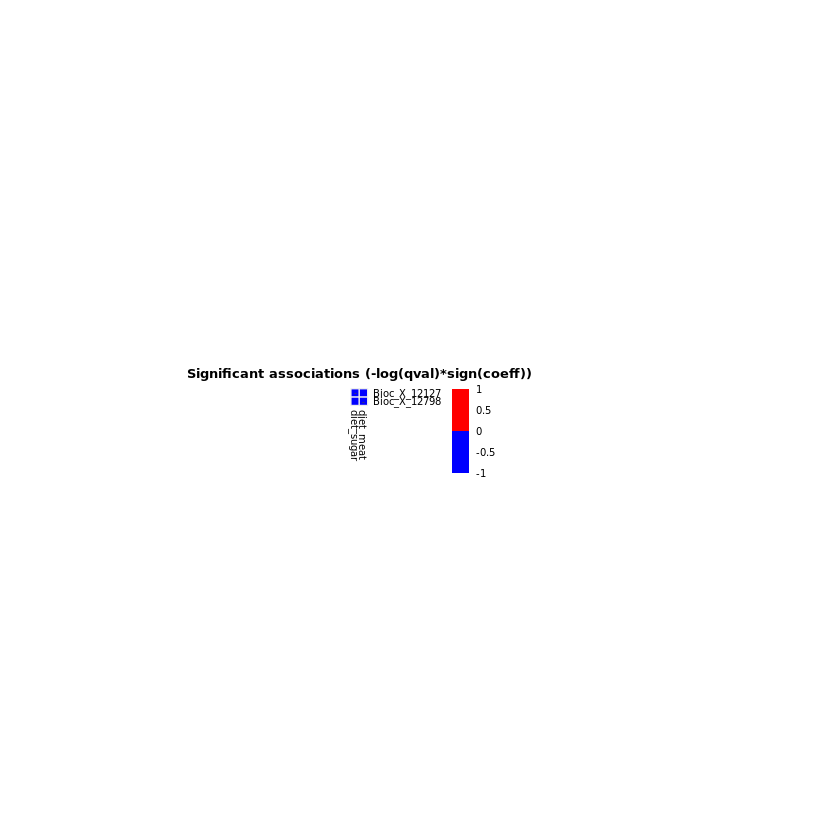

In [12]:
diet = Maaslin2(
    input_data = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_data_082922.txt', 
    input_metadata = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_meta_data_082922.txt', 
    output = "/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/diet", 
    fixed_effects = c('diet_meat','diet_sugar','diet_veg','diet_grains','diet_fruit'),
    reference = 'study_ptorhc'
)

In [13]:
medication = Maaslin2(
    input_data = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_data_082922.txt', 
    input_metadata = '/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/maaslin_meta_data_082922.txt', 
    output = "/projects/ohlab/ruoyun/MECFS/train_model/MECFS/all_tps/data/metadata/maaslin/medication", 
    fixed_effects = c('antifungals','antibiotics','probiotics','antivirals'),
    reference = 'study_ptorhc'
)

[1] "Creating output folder"
[1] "Creating output figures folder"
2022-08-30 15:49:04 INFO::Writing function arguments to log file
2022-08-30 15:49:04 INFO::Verifying options selected are valid
2022-08-30 15:49:04 INFO::Determining format of input files
2022-08-30 15:49:04 INFO::Input format is data samples as rows and metadata samples as rows
2022-08-30 15:49:04 INFO::Formula for fixed effects: expr ~  antifungals + antibiotics + probiotics + antivirals
2022-08-30 15:49:04 INFO::Filter data based on min abundance and min prevalence
2022-08-30 15:49:04 INFO::Total samples in data: 180
2022-08-30 15:49:04 INFO::Min samples required with min abundance for a feature not to be filtered: 18.000000
2022-08-30 15:49:04 INFO::Total filtered features: 89
2022-08-30 15:49:04 INFO::Filtered feature names from abundance and prevalence filtering: Specie_Bacteroides_plebeius, Specie_Eubacterium_sp_CAG_180, Specie_Parabacteroides_johnsonii, Specie_Bacteroides_coprocola, Specie_Alistipes_inops, Specie

Warning message in vegan::decostand(features_norm, method = "total", MARGIN = 1, :
“input data contains negative entries: result may be non-sense
”


2022-08-30 15:49:05 INFO::Applying z-score to standardize continuous metadata
2022-08-30 15:49:05 INFO::Running selected transform method: LOG


Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs produced”
Warning message in FUN(newX[, i], ...):
“NaNs pr

2022-08-30 15:49:11 INFO::Running selected analysis method: LM
2022-08-30 15:49:11 INFO::Fitting model to feature number 1, Specie_Bacteroides_vulgatus
2022-08-30 15:49:11 INFO::Fitting model to feature number 2, Specie_Bacteroides_uniformis
2022-08-30 15:49:11 INFO::Fitting model to feature number 3, Specie_Bacteroides_stercoris
2022-08-30 15:49:11 INFO::Fitting model to feature number 4, Specie_Prevotella_copri
2022-08-30 15:49:11 INFO::Fitting model to feature number 5, Specie_Bacteroides_dorei
2022-08-30 15:49:11 INFO::Fitting model to feature number 6, Specie_Faecalibacterium_prausnitzii
2022-08-30 15:49:11 INFO::Fitting model to feature number 7, Specie_Alistipes_putredinis
2022-08-30 15:49:11 INFO::Fitting model to feature number 8, Specie_Bacteroides_ovatus
2022-08-30 15:49:11 INFO::Fitting model to feature number 9, Specie_Parabacteroides_distasonis
2022-08-30 15:49:11 INFO::Fitting model to feature number 10, Specie_Eubacterium_rectale
2022-08-30 15:49:11 INFO::Fitting model 

2022-08-30 15:49:36 INFO::Creating boxplot for categorical data, antivirals vs Bioc_X_12851
